In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [4]:
# separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']], 
    data['survived'], 
    test_size=0.3, 
    random_state=0)  

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [5]:
X_train.isnull().mean()    

age     0.191048
fare    0.000000
dtype: float64

In [6]:
#  a function to fill missing values with an arbitrary value:


def impute_na(df, variable, value):

    return df[variable].fillna(value)

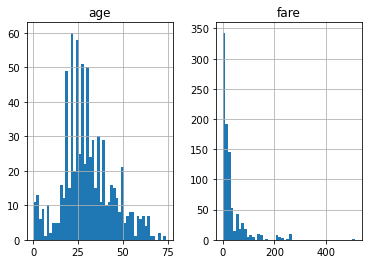

In [7]:
# explore the distribution of the variables


X_train.hist(bins=50)
plt.show()

In [8]:
#  replace NA by 2 different arbitrary values
# one at the far right end of the distribution ==> 99 and -1

# first replace with 99
X_train['Age_99'] = impute_na(X_train, 'age', 99)

# now replace with -1
X_train['Age_minus1'] = impute_na(X_train, 'age', -1)

X_train.head(15)

,age,fare,Age_99,Age_minus1
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,99.0,-1.0
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,99.0,-1.0
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


In [9]:
#can see a change in the variance after arbitrary value imputation 
print('Original variable variance: ', X_train['age'].var())
print('Variance after 99 imputation: ', X_train['Age_99'].var())
print('Variance after -1 imputation: ', X_train['Age_minus1'].var())

Original variable variance:  194.16304666581863
Variance after 99 imputation:  888.7051993280913
Variance after -1 imputation:  307.94005269387753


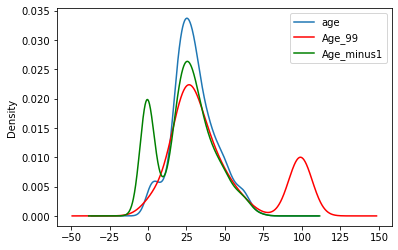

In [10]:
#  can see that the distribution has changed  with now more values accumulating towards the arbitrary values

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with 99
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with -1
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [11]:
# arbitrary value imputation may affect the relationship  with the other variables in the dataset, let's have a look

X_train[['fare', 'age', 'Age_99', 'Age_minus1']].cov()

,fare,age,Age_99,Age_minus1
fare,2248.326729,136.176223,-38.722001,177.733891
age,136.176223,194.163047,194.163047,194.163047
Age_99,-38.722001,194.163047,888.705199,-175.265319
Age_minus1,177.733891,194.163047,-175.265319,307.940053


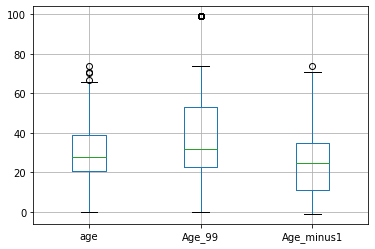

In [12]:
# arbitrary value imputation may  affect the perception of outliers
X_train[['age', 'Age_99', 'Age_minus1']].boxplot()